In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df_train= pd.read_csv('C:/Users/OJO ABAYOMI MOSES/Documents/ECG-detection-main/mitbih_train.csv', header=None)
df_test=pd.read_csv('C:/Users/OJO ABAYOMI MOSES/Documents/ECG-detection-main/mitbih_test.csv',header=None)

In [3]:
#split target and value

train_target=df_train[187]
test_target=df_test[187]
train=df_train.drop(187,axis=1)
test=df_test.drop(187,axis=1)

BASIC STATISTICS


In [4]:
print("Train Data\n",df_train.describe())
print("\nTest Data\n",df_test.describe())

Train Data
                 0             1             2             3             4    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.210399      0.205808      0.201773      0.198691      0.196757   
std        0.171909      0.178481      

Visualization

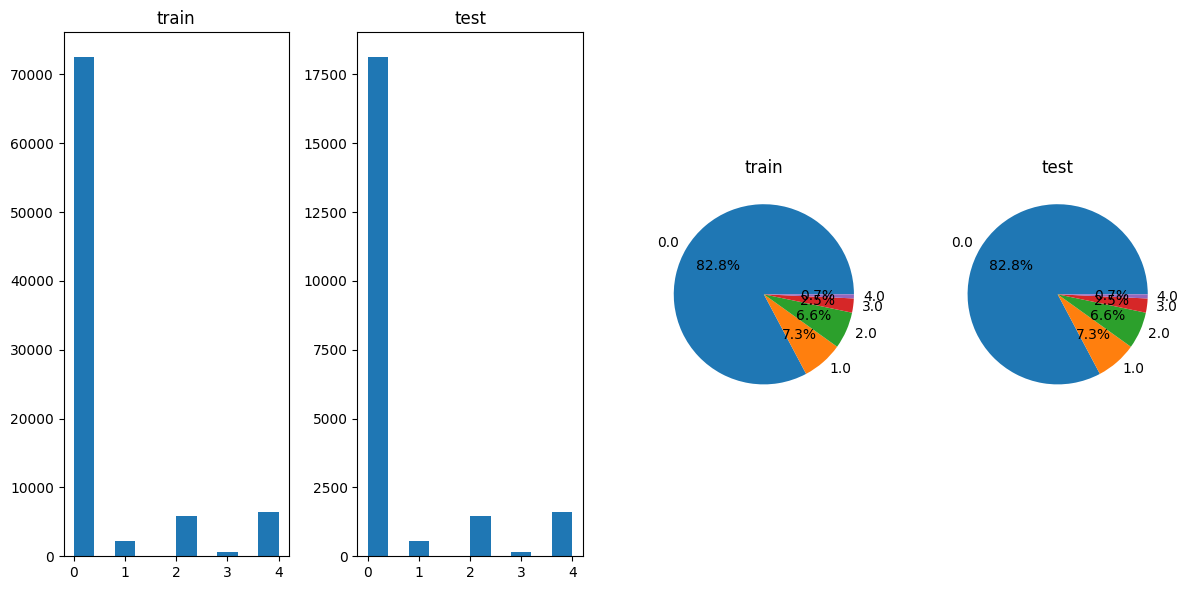

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,4,1)
plt.hist(df_train[187])
plt.title("train")

plt.subplot(1,4,2)
plt.hist(df_test[187])
plt.title("test")

plt.subplot(1,4,3)
plt.pie(df_train[187].value_counts(),labels=df_train[187].unique(),autopct='%1.1f%%')
plt.title("train")

plt.subplot(1,4,4)
plt.pie(df_test[187].value_counts(),labels=df_test[187].unique(),autopct='%1.1f%%')
plt.title("test")

plt.tight_layout()
plt.show()

DECISION TREE

In [6]:

from sklearn.tree import plot_tree  # Import the plot_tree function
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
clf = DecisionTreeClassifier()
clf.fit(train,train_target)



DecisionTreeClassifier()

DECISION TREE CLASSIFIER

Decision Tree Accuracy: 0.95
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     18118
         1.0       0.64      0.63      0.64       556
         2.0       0.85      0.86      0.86      1448
         3.0       0.58      0.59      0.58       162
         4.0       0.94      0.94      0.94      1608

    accuracy                           0.95     21892
   macro avg       0.80      0.80      0.80     21892
weighted avg       0.95      0.95      0.95     21892



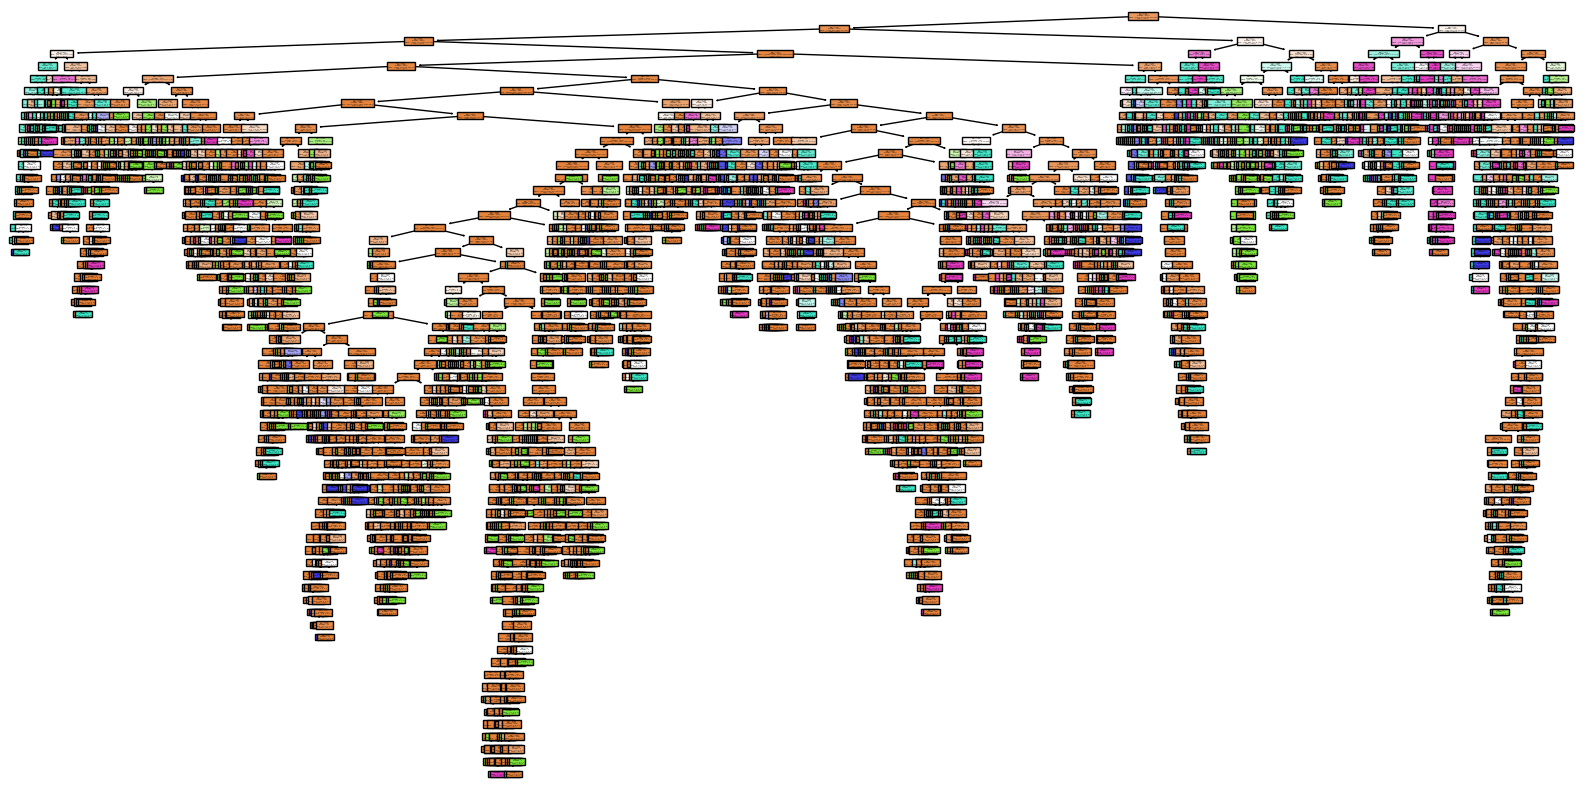

In [7]:

DecisionTreeClassifier()
predictions = clf.predict(test)
dt_accuracy = accuracy_score(test_target, predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
dt_report = classification_report(test_target, predictions)
print(dt_report)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=train.columns, class_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.show()


Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=50)
clf.fit(train,train_target)

RandomForestClassifier(random_state=50)

Random Forest Classifier

Random Forest Accuracy: 0.97


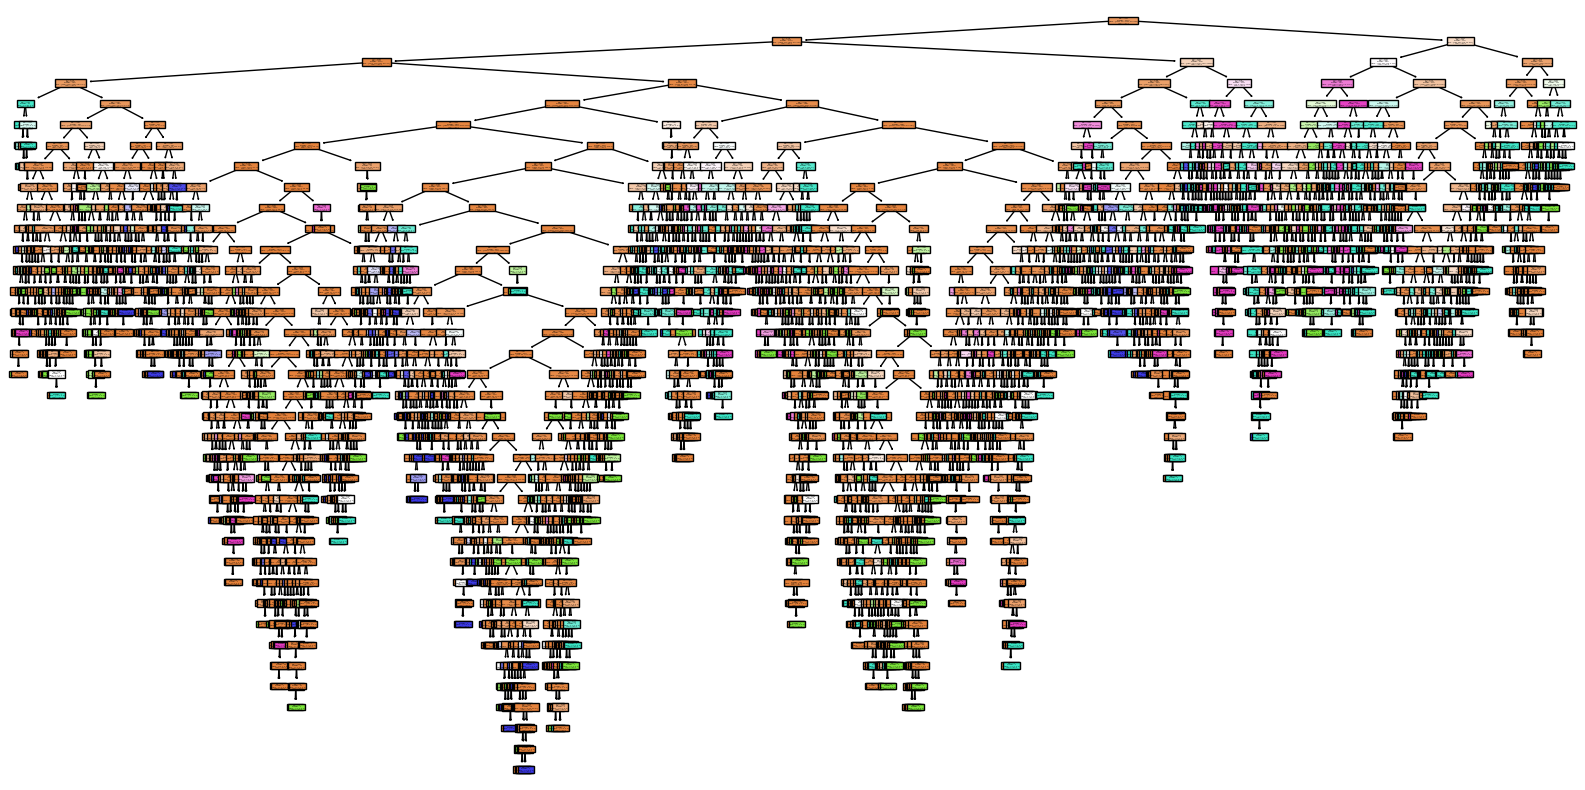

In [9]:
RandomForestClassifier(random_state=50)
Ranpredictions = clf.predict(test)
rf_accuracy = accuracy_score(test_target, Ranpredictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
rf_report = classification_report(test_target, predictions)
# Visualize one tree from the random forest
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True, feature_names=train.columns, class_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.show()


XGBoost

In [10]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
model = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100
)
model.fit(train,train_target)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

XGB Classifier

In [11]:
import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100)
model.fit(train, train_target)

predictions = model.predict(test)
xgb_accuracy = accuracy_score(test_target, predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

xgb_report = classification_report(test_target, predictions)
print(xgb_report)


XGBoost Accuracy: 0.9597
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     18118
         1.0       0.95      0.53      0.68       556
         2.0       0.95      0.79      0.86      1448
         3.0       0.74      0.38      0.50       162
         4.0       0.98      0.91      0.95      1608

    accuracy                           0.96     21892
   macro avg       0.92      0.72      0.79     21892
weighted avg       0.96      0.96      0.96     21892



Hyperparametric tuning

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
}

# Initialize the classifier
model = RandomForestClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

grid_search.fit(train,train_target)

# Get the best hyperparameters and score

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate on the test set

test_score = grid_search.score(test, test_target)
print(f"Best hyperparameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Test score: {test_score}")

Best hyperparameters: {'max_depth': None, 'n_estimators': 150}
Best score: 0.9739931861125889
Test score: 0.9740087703270601


Comparison

In [13]:
#comparison 
print("Decision Tree\n",dt_report,"\nRandom Forest\n",rf_report,"\nXGBoost\n",xgb_report)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

Decision Tree
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     18118
         1.0       0.64      0.63      0.64       556
         2.0       0.85      0.86      0.86      1448
         3.0       0.58      0.59      0.58       162
         4.0       0.94      0.94      0.94      1608

    accuracy                           0.95     21892
   macro avg       0.80      0.80      0.80     21892
weighted avg       0.95      0.95      0.95     21892
 
Random Forest
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     18118
         1.0       0.64      0.63      0.64       556
         2.0       0.85      0.86      0.86      1448
         3.0       0.58      0.59      0.58       162
         4.0       0.94      0.94      0.94      1608

    accuracy                           0.95     21892
   macro avg       0.80      0.80      0.80     21892
weighted avg       0.95      0.95      0.95   